# Descriptive Data Analysis for OU Analyse Dataset
This notebook provides an exploratory data analysis focusing on `studentAssessment.csv`, `studentVle.csv`, and `studentInfo.csv`, with a brief overview of other tables.

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Educational Data Analysis - Comprehensive EDA

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plot style and parameters
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
# Set plot style
sns.set(style='whitegrid')

In [11]:
# Define the data path and filenames
data_path = 'data/raw/anonymisedData'
filenames = [
    'assessments.csv',
    'courses.csv',
    'studentAssessment.csv',
    'studentInfo.csv',
    'studentRegistration.csv',
    'studentVle.csv',
    'vle.csv'
]

In [12]:
# Load all dataframes into a dictionary
df_dict = {}
for file in filenames:
    df_name = file.replace('.csv', '')
    df_dict[df_name] = pd.read_csv(os.path.join(data_path, file))
    print(f"Loaded {file} with shape {df_dict[df_name].shape}")

Loaded assessments.csv with shape (206, 6)
Loaded courses.csv with shape (22, 3)
Loaded studentAssessment.csv with shape (173912, 5)
Loaded studentInfo.csv with shape (32593, 12)
Loaded studentRegistration.csv with shape (32593, 5)
Loaded studentVle.csv with shape (10655280, 6)
Loaded vle.csv with shape (6364, 6)


=== TIMING DISTRIBUTION ANALYSIS ===

📊 DEREGISTRATION DATA:
   • Total students: 32,593
   • Students who deregistered: 10,072
   • Deregistration rate: 30.9%

📝 ASSESSMENT DATA:
   • Total assessments: 206
   • Assessment types: ['TMA' 'Exam' 'CMA']
   • Date range: 12 to 261 days from start


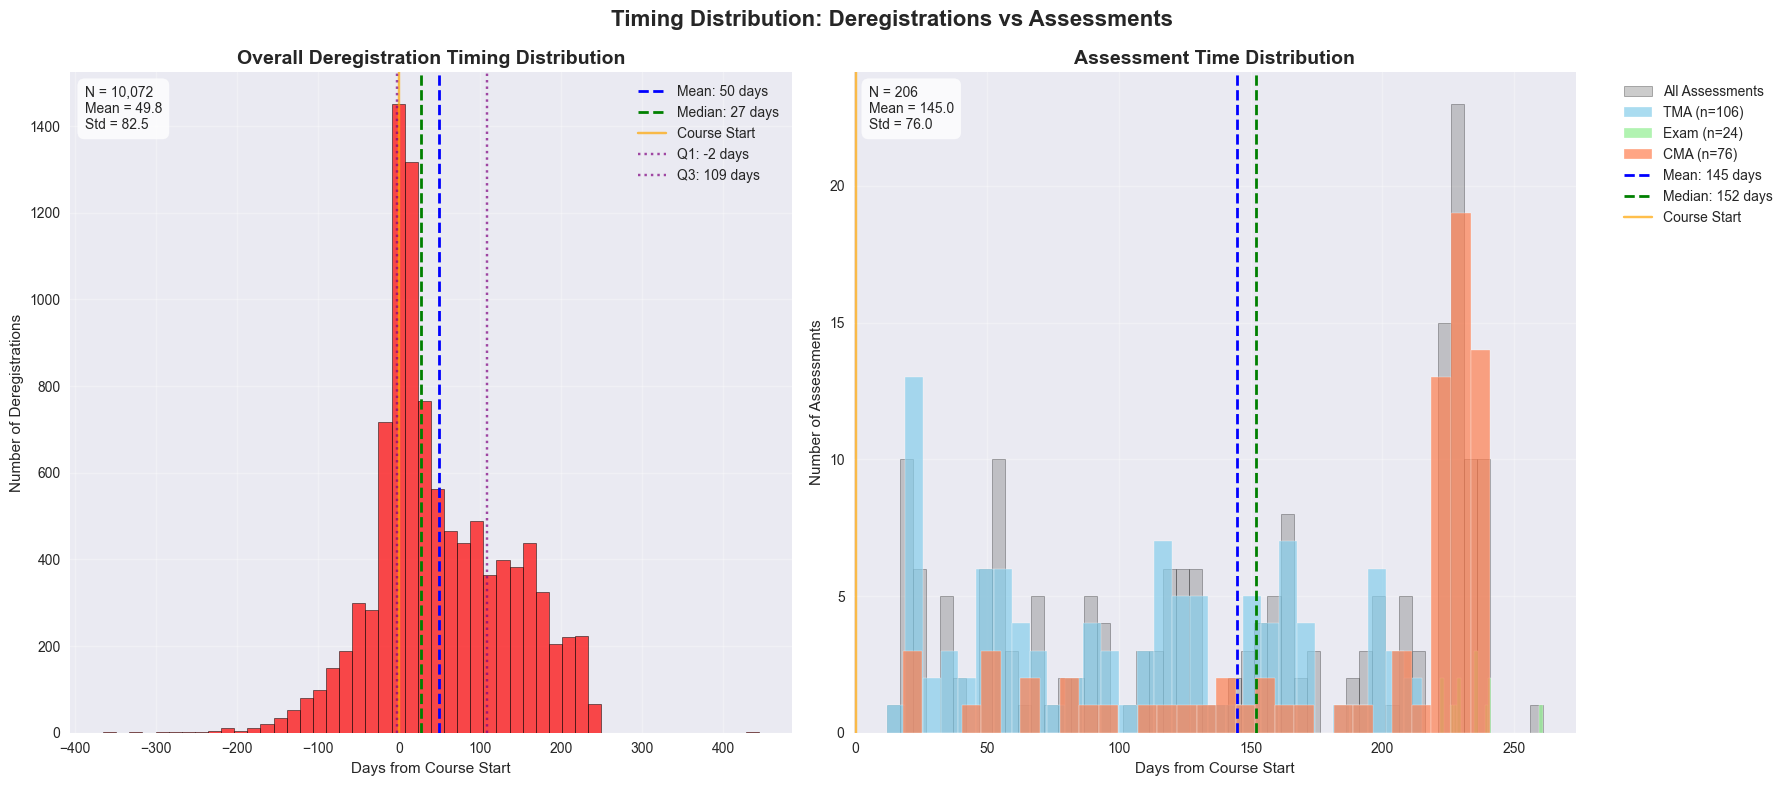


=== COMPARATIVE TIMING ANALYSIS ===

📈 DEREGISTRATION TIMING:
   • Mean: 49.8 days
   • Median: 27.0 days
   • Standard deviation: 82.5 days
   • Range: -365 - 444 days

📝 ASSESSMENT TIMING:
   • Mean: 145.0 days
   • Median: 152.0 days
   • Standard deviation: 76.0 days
   • Range: 12 - 261 days

📊 ASSESSMENT BREAKDOWN BY TYPE:
   • TMA:
     - Count: 106
     - Mean timing: 105.1 days
     - Earliest: 12 days
     - Latest: 215 days
   • Exam:
     - Count: 24
     - Mean timing: 234.3 days
     - Earliest: 222 days
     - Latest: 261 days
   • CMA:
     - Count: 76
     - Mean timing: 185.3 days
     - Earliest: 18 days
     - Latest: 241 days

🔍 TIMING OVERLAP ANALYSIS:
   • Deregistrations during assessment period: 6,413 (63.7%)
   • Early deregistrations (before first assessment): 3,658
   • Late deregistrations (after last assessment): 1

⚠️ CRITICAL PERIODS:
   • First week deregistrations: 3,415 (33.9%)
   • First month deregistrations: 5,127 (50.9%)
   • Peak assessment week

In [18]:
# Deregistration and Assessment Timing Distribution Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

print("=== TIMING DISTRIBUTION ANALYSIS ===\n")

# ================================================================
# Data Preparation
# ================================================================

# 1. Deregistration data
reg_data = df_dict['studentRegistration'].copy()
dereg_data = reg_data[reg_data['date_unregistration'].notna()].copy()

print(f"📊 DEREGISTRATION DATA:")
print(f"   • Total students: {len(reg_data):,}")
print(f"   • Students who deregistered: {len(dereg_data):,}")
print(f"   • Deregistration rate: {len(dereg_data)/len(reg_data)*100:.1f}%")

# 2. Assessment data
assessments = df_dict['assessments'].copy()

print(f"\n📝 ASSESSMENT DATA:")
print(f"   • Total assessments: {len(assessments):,}")
print(f"   • Assessment types: {assessments['assessment_type'].unique()}")
print(f"   • Date range: {assessments['date'].min():.0f} to {assessments['date'].max():.0f} days from start")

# ================================================================
# Visualization
# ================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Timing Distribution: Deregistrations vs Assessments', fontsize=16, fontweight='bold')

# ================================================================
# Plot 1: Overall Deregistration Timing Distribution
# ================================================================

axes[0].hist(dereg_data['date_unregistration'], bins=50, alpha=0.7, color='red', 
             edgecolor='black', linewidth=0.5)
axes[0].set_title('Overall Deregistration Timing Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days from Course Start')
axes[0].set_ylabel('Number of Deregistrations')
axes[0].grid(True, alpha=0.3)

# Add key statistics as vertical lines
mean_dereg = dereg_data['date_unregistration'].mean()
median_dereg = dereg_data['date_unregistration'].median()

axes[0].axvline(x=mean_dereg, color='blue', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_dereg:.0f} days')
axes[0].axvline(x=median_dereg, color='green', linestyle='--', linewidth=2, 
                label=f'Median: {median_dereg:.0f} days')
axes[0].axvline(x=0, color='orange', linestyle='-', alpha=0.7, 
                label='Course Start')

# Add quartile markers
q25 = dereg_data['date_unregistration'].quantile(0.25)
q75 = dereg_data['date_unregistration'].quantile(0.75)
axes[0].axvline(x=q25, color='purple', linestyle=':', alpha=0.7, 
                label=f'Q1: {q25:.0f} days')
axes[0].axvline(x=q75, color='purple', linestyle=':', alpha=0.7, 
                label=f'Q3: {q75:.0f} days')

axes[0].legend()

# Add text box with key statistics
stats_text = f'N = {len(dereg_data):,}\nMean = {mean_dereg:.1f}\nStd = {dereg_data["date_unregistration"].std():.1f}'
axes[0].text(0.02, 0.98, stats_text, transform=axes[0].transAxes, 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
             verticalalignment='top', fontsize=10)

# ================================================================
# Plot 2: Assessment Time Distribution
# ================================================================

# Create histogram for assessments with different colors for different types
assessment_types = assessments['assessment_type'].unique()
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'plum']

# Plot all assessments first (combined)
axes[1].hist(assessments['date'], bins=50, alpha=0.4, color='gray', 
             edgecolor='black', linewidth=0.5, label='All Assessments')

# Then plot each type separately
for i, assess_type in enumerate(assessment_types):
    type_data = assessments[assessments['assessment_type'] == assess_type]['date']
    axes[1].hist(type_data, bins=30, alpha=0.7, color=colors[i % len(colors)], 
                 label=f'{assess_type} (n={len(type_data)})')

axes[1].set_title('Assessment Time Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Days from Course Start')
axes[1].set_ylabel('Number of Assessments')
axes[1].grid(True, alpha=0.3)

# Add key statistics for assessments
mean_assess = assessments['date'].mean()
median_assess = assessments['date'].median()

axes[1].axvline(x=mean_assess, color='blue', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_assess:.0f} days')
axes[1].axvline(x=median_assess, color='green', linestyle='--', linewidth=2, 
                label=f'Median: {median_assess:.0f} days')
axes[1].axvline(x=0, color='orange', linestyle='-', alpha=0.7, 
                label='Course Start')

axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text box with assessment statistics
assess_stats_text = f'N = {len(assessments):,}\nMean = {mean_assess:.1f}\nStd = {assessments["date"].std():.1f}'
axes[1].text(0.02, 0.98, assess_stats_text, transform=axes[1].transAxes, 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
             verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.show()

# ================================================================
# Statistical Summary
# ================================================================

print(f"\n=== COMPARATIVE TIMING ANALYSIS ===\n")

print(f"📈 DEREGISTRATION TIMING:")
print(f"   • Mean: {mean_dereg:.1f} days")
print(f"   • Median: {median_dereg:.1f} days")
print(f"   • Standard deviation: {dereg_data['date_unregistration'].std():.1f} days")
print(f"   • Range: {dereg_data['date_unregistration'].min():.0f} - {dereg_data['date_unregistration'].max():.0f} days")

print(f"\n📝 ASSESSMENT TIMING:")
print(f"   • Mean: {mean_assess:.1f} days")
print(f"   • Median: {median_assess:.1f} days")
print(f"   • Standard deviation: {assessments['date'].std():.1f} days")
print(f"   • Range: {assessments['date'].min():.0f} - {assessments['date'].max():.0f} days")

print(f"\n📊 ASSESSMENT BREAKDOWN BY TYPE:")
for assess_type in assessment_types:
    type_data = assessments[assessments['assessment_type'] == assess_type]
    print(f"   • {assess_type}:")
    print(f"     - Count: {len(type_data)}")
    print(f"     - Mean timing: {type_data['date'].mean():.1f} days")
    print(f"     - Earliest: {type_data['date'].min():.0f} days")
    print(f"     - Latest: {type_data['date'].max():.0f} days")

# Calculate overlap analysis
print(f"\n🔍 TIMING OVERLAP ANALYSIS:")
dereg_in_assess_period = dereg_data[
    (dereg_data['date_unregistration'] >= assessments['date'].min()) & 
    (dereg_data['date_unregistration'] <= assessments['date'].max())
]
overlap_rate = len(dereg_in_assess_period) / len(dereg_data) * 100

print(f"   • Deregistrations during assessment period: {len(dereg_in_assess_period):,} ({overlap_rate:.1f}%)")
print(f"   • Early deregistrations (before first assessment): {len(dereg_data[dereg_data['date_unregistration'] < assessments['date'].min()]):,}")
print(f"   • Late deregistrations (after last assessment): {len(dereg_data[dereg_data['date_unregistration'] > assessments['date'].max()]):,}")

# Check for deregistrations around assessment times
print(f"\n⚠️ CRITICAL PERIODS:")
first_week_dereg = len(dereg_data[dereg_data['date_unregistration'] <= 7])
first_month_dereg = len(dereg_data[dereg_data['date_unregistration'] <= 30])

print(f"   • First week deregistrations: {first_week_dereg:,} ({first_week_dereg/len(dereg_data)*100:.1f}%)")
print(f"   • First month deregistrations: {first_month_dereg:,} ({first_month_dereg/len(dereg_data)*100:.1f}%)")

# Check assessment density periods
assessment_density = assessments.groupby(assessments['date'] // 7)['date'].count()  # Group by weeks
peak_week = assessment_density.idxmax()
peak_density = assessment_density.max()

print(f"   • Peak assessment week: Week {peak_week} ({peak_density} assessments)")
print(f"   • Assessment-heavy period: Weeks {assessment_density[assessment_density >= assessment_density.quantile(0.8)].index.min()}-{assessment_density[assessment_density >= assessment_density.quantile(0.8)].index.max()}")

=== VLE ENGAGEMENT DISTRIBUTIONAL PROPERTIES ===

📊 VLE ENGAGEMENT OVERVIEW:
   • Total VLE interactions: 10,655,280
   • Unique students: 26,074
   • Total clicks: 39,605,099
   • Date range: -25 - 269 days


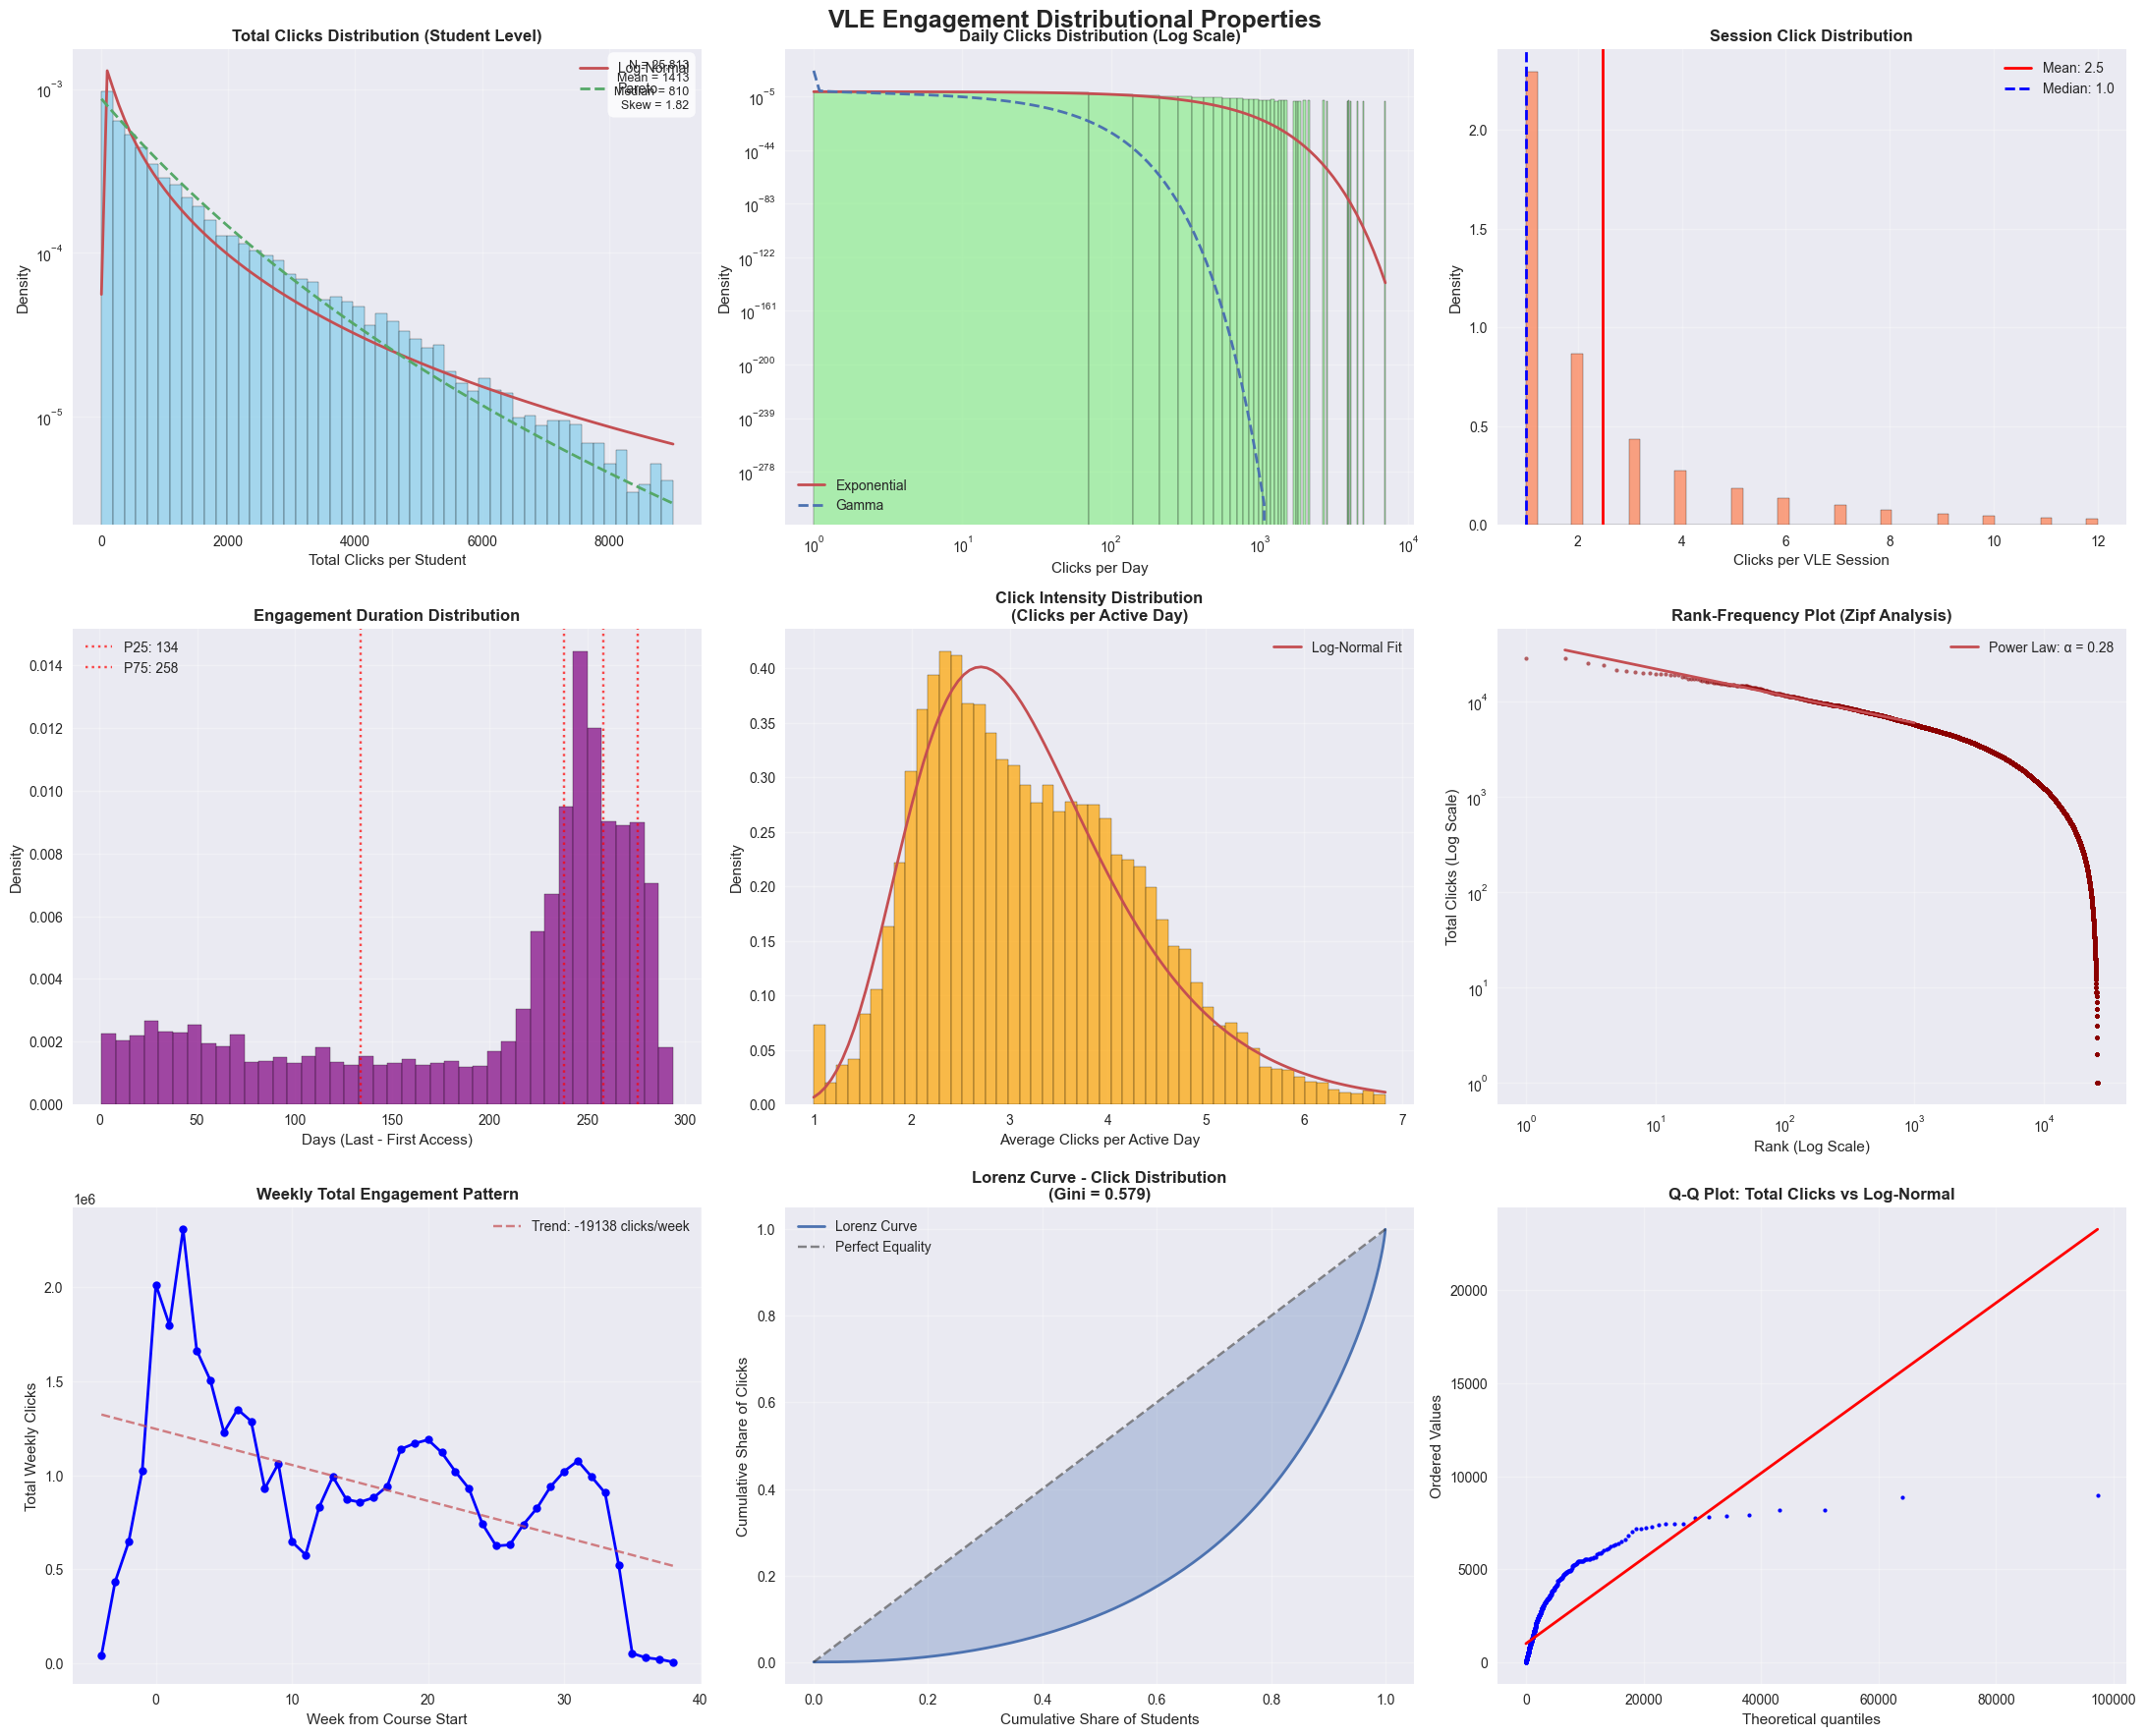


=== DISTRIBUTIONAL PROPERTIES SUMMARY ===

📊 STUDENT-LEVEL ENGAGEMENT STATISTICS:
   • Total clicks - Mean: 1519, Median: 824
   • Total clicks - Skewness: 3.07
   • Total clicks - Kurtosis: 16.37
   • Gini coefficient (inequality): 0.579

📈 DAILY ENGAGEMENT STATISTICS:
   • Daily clicks - Mean: 22.8, Median: 12.0
   • Daily clicks - Skewness: 15.55
   • Zero-click days: 0.0%

🔍 SESSION-LEVEL STATISTICS:
   • Session clicks - Mean: 3.7, Median: 2.0
   • Session clicks - Skewness: 122.92
   • Sessions with 1 click: 48.0%
   • Sessions with >10 clicks: 6.4%

📏 POWER LAW ANALYSIS:
   • Estimated power law exponent (α): 0.28
   • R² of power law fit: 0.990

⚖️ INEQUALITY MEASURES:
   • Gini coefficient (total clicks): 0.579
   • Gini coefficient (daily clicks): 0.602
   • Gini coefficient (session clicks): 0.578
   • Top 10% students account for 39.8% of all clicks

🎯 DISTRIBUTIONAL CHARACTERISTICS:
   • Heavy-tailed: Yes
   • Log-normal fit quality: Poor
   • Power law behavior: Weak

💡 

In [20]:
# VLE Engagement Distributional Properties Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import lognorm, gamma, weibull_min, expon
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['font.size'] = 11

print("=== VLE ENGAGEMENT DISTRIBUTIONAL PROPERTIES ===\n")

# ================================================================
# Data Preparation
# ================================================================

# Get VLE engagement data
vle_data = df_dict['studentVle'].copy()

# Calculate student-level engagement metrics
student_engagement = vle_data.groupby('id_student').agg({
    'sum_click': ['sum', 'mean', 'std', 'count'],
    'date': ['min', 'max']
}).round(2)

# Flatten column names
student_engagement.columns = ['total_clicks', 'avg_daily_clicks', 'click_std', 'active_days', 'first_access', 'last_access']
student_engagement['engagement_duration'] = student_engagement['last_access'] - student_engagement['first_access']
student_engagement['click_intensity'] = student_engagement['total_clicks'] / student_engagement['active_days']

# Daily engagement patterns
daily_engagement = vle_data.groupby(['id_student', 'date'])['sum_click'].sum().reset_index()

# Session-level analysis (individual VLE interactions)
session_data = vle_data['sum_click'].copy()

print(f"📊 VLE ENGAGEMENT OVERVIEW:")
print(f"   • Total VLE interactions: {len(vle_data):,}")
print(f"   • Unique students: {len(student_engagement):,}")
print(f"   • Total clicks: {vle_data['sum_click'].sum():,}")
print(f"   • Date range: {vle_data['date'].min():.0f} - {vle_data['date'].max():.0f} days")

# ================================================================
# Visualization
# ================================================================

fig, axes = plt.subplots(3, 3, figsize=(22, 18))
fig.suptitle('VLE Engagement Distributional Properties', fontsize=18, fontweight='bold')

# ================================================================
# Plot 1: Total Clicks Distribution (Student Level)
# ================================================================

# Remove zeros and extreme outliers for better visualization
total_clicks_clean = student_engagement['total_clicks'][student_engagement['total_clicks'] > 0]
q99 = total_clicks_clean.quantile(0.99)
total_clicks_viz = total_clicks_clean[total_clicks_clean <= q99]

axes[0,0].hist(total_clicks_viz, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[0,0].set_title('Total Clicks Distribution (Student Level)', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Total Clicks per Student')
axes[0,0].set_ylabel('Density')
axes[0,0].set_yscale('log')
axes[0,0].grid(True, alpha=0.3)

# Fit and overlay distributions
x_range = np.linspace(total_clicks_viz.min(), total_clicks_viz.max(), 100)

# Log-normal fit
log_params = stats.lognorm.fit(total_clicks_viz, floc=0)
axes[0,0].plot(x_range, stats.lognorm.pdf(x_range, *log_params), 'r-', linewidth=2, label='Log-Normal')

# Power law approximation (Pareto)
pareto_params = stats.pareto.fit(total_clicks_viz)
axes[0,0].plot(x_range, stats.pareto.pdf(x_range, *pareto_params), 'g--', linewidth=2, label='Pareto')

axes[0,0].legend()

# Add statistics
stats_text = f'N = {len(total_clicks_viz):,}\nMean = {total_clicks_viz.mean():.0f}\nMedian = {total_clicks_viz.median():.0f}\nSkew = {stats.skew(total_clicks_viz):.2f}'
axes[0,0].text(0.98, 0.98, stats_text, transform=axes[0,0].transAxes, 
               bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
               verticalalignment='top', horizontalalignment='right', fontsize=9)

# ================================================================
# Plot 2: Daily Clicks Distribution (Log Scale)
# ================================================================

daily_clicks = daily_engagement['sum_click']
daily_clicks_nonzero = daily_clicks[daily_clicks > 0]

axes[0,1].hist(daily_clicks_nonzero, bins=100, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
axes[0,1].set_title('Daily Clicks Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Clicks per Day')
axes[0,1].set_ylabel('Density')
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].grid(True, alpha=0.3)

# Add distribution fits
x_log = np.logspace(0, np.log10(daily_clicks_nonzero.max()), 100)

# Exponential fit
exp_params = stats.expon.fit(daily_clicks_nonzero)
axes[0,1].plot(x_log, stats.expon.pdf(x_log, *exp_params), 'r-', linewidth=2, label='Exponential')

# Gamma fit
gamma_params = stats.gamma.fit(daily_clicks_nonzero)
axes[0,1].plot(x_log, stats.gamma.pdf(x_log, *gamma_params), 'b--', linewidth=2, label='Gamma')

axes[0,1].legend()

# ================================================================
# Plot 3: Session Click Distribution (Heavy Tail)
# ================================================================

session_nonzero = session_data[session_data > 0]
session_viz = session_nonzero[session_nonzero <= session_nonzero.quantile(0.95)]

axes[0,2].hist(session_viz, bins=50, alpha=0.7, color='coral', edgecolor='black', density=True)
axes[0,2].set_title('Session Click Distribution', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Clicks per VLE Session')
axes[0,2].set_ylabel('Density')
axes[0,2].grid(True, alpha=0.3)

# Add mean and median lines
axes[0,2].axvline(session_viz.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean: {session_viz.mean():.1f}')
axes[0,2].axvline(session_viz.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {session_viz.median():.1f}')
axes[0,2].legend()

# ================================================================
# Plot 4: Engagement Duration Distribution
# ================================================================

duration_clean = student_engagement['engagement_duration'][student_engagement['engagement_duration'] > 0]

axes[1,0].hist(duration_clean, bins=40, alpha=0.7, color='purple', edgecolor='black', density=True)
axes[1,0].set_title('Engagement Duration Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Days (Last - First Access)')
axes[1,0].set_ylabel('Density')
axes[1,0].grid(True, alpha=0.3)

# Add percentile markers
for p in [25, 50, 75, 90]:
    val = duration_clean.quantile(p/100)
    axes[1,0].axvline(val, color='red', alpha=0.7, linestyle=':', 
                      label=f'P{p}: {val:.0f}' if p in [25, 75] else None)
if 25 in [25, 75]:  # Only show legend for some percentiles to avoid clutter
    axes[1,0].legend()

# ================================================================
# Plot 5: Click Intensity Distribution (Clicks per Active Day)
# ================================================================

intensity_clean = student_engagement['click_intensity'][
    (student_engagement['click_intensity'] > 0) & 
    (student_engagement['click_intensity'] < student_engagement['click_intensity'].quantile(0.99))
]

axes[1,1].hist(intensity_clean, bins=50, alpha=0.7, color='orange', edgecolor='black', density=True)
axes[1,1].set_title('Click Intensity Distribution\n(Clicks per Active Day)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average Clicks per Active Day')
axes[1,1].set_ylabel('Density')
axes[1,1].grid(True, alpha=0.3)

# Fit log-normal distribution
intensity_log_params = stats.lognorm.fit(intensity_clean, floc=0)
x_intensity = np.linspace(intensity_clean.min(), intensity_clean.max(), 100)
axes[1,1].plot(x_intensity, stats.lognorm.pdf(x_intensity, *intensity_log_params), 
               'r-', linewidth=2, label='Log-Normal Fit')
axes[1,1].legend()

# ================================================================
# Plot 6: Zipf/Power Law Analysis (Rank-Frequency)
# ================================================================

# Rank students by total engagement
sorted_engagement = student_engagement['total_clicks'].sort_values(ascending=False)
ranks = np.arange(1, len(sorted_engagement) + 1)

axes[1,2].loglog(ranks, sorted_engagement, 'o', alpha=0.6, markersize=3, color='darkred')
axes[1,2].set_title('Rank-Frequency Plot (Zipf Analysis)', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Rank (Log Scale)')
axes[1,2].set_ylabel('Total Clicks (Log Scale)')
axes[1,2].grid(True, alpha=0.3)

# Fit power law
log_ranks = np.log10(ranks[1:1000])  # Avoid log(0), use first 1000 points
log_engagement = np.log10(sorted_engagement.iloc[1:1000])
slope, intercept = np.polyfit(log_ranks, log_engagement, 1)

# Plot fitted line
x_fit = ranks[1:1000]
y_fit = 10**(intercept) * x_fit**slope
axes[1,2].plot(x_fit, y_fit, 'r-', linewidth=2, label=f'Power Law: α = {-slope:.2f}')
axes[1,2].legend()

# ================================================================
# Plot 7: Temporal Engagement Pattern (Weekly Aggregation)
# ================================================================

vle_data['week'] = (vle_data['date'] // 7).astype(int)
weekly_engagement = vle_data.groupby(['week'])['sum_click'].agg(['sum', 'count', 'mean']).reset_index()
weekly_engagement = weekly_engagement[weekly_engagement['week'] <= 40]  # Focus on main course period

axes[2,0].plot(weekly_engagement['week'], weekly_engagement['sum'], 'o-', linewidth=2, markersize=6, color='blue')
axes[2,0].set_title('Weekly Total Engagement Pattern', fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Week from Course Start')
axes[2,0].set_ylabel('Total Weekly Clicks')
axes[2,0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(weekly_engagement['week'], weekly_engagement['sum'], 1)
p = np.poly1d(z)
axes[2,0].plot(weekly_engagement['week'], p(weekly_engagement['week']), 'r--', alpha=0.7, 
               label=f'Trend: {z[0]:+.0f} clicks/week')
axes[2,0].legend()

# ================================================================
# Plot 8: Gini Coefficient Analysis (Inequality)
# ================================================================

def gini_coefficient(x):
    """Calculate Gini coefficient for measuring inequality"""
    x = np.array(x)
    x = x[x > 0]  # Remove zeros
    x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(x)
    return (2 * np.sum((np.arange(1, n+1) * x))) / (n * cumsum[-1]) - (n + 1) / n

# Calculate Gini for different metrics
gini_total = gini_coefficient(student_engagement['total_clicks'])
gini_daily = gini_coefficient(daily_clicks_nonzero)
gini_session = gini_coefficient(session_nonzero)

# Lorenz curve for total clicks
sorted_clicks = np.sort(student_engagement['total_clicks'][student_engagement['total_clicks'] > 0])
cumulative_clicks = np.cumsum(sorted_clicks)
cumulative_clicks_norm = cumulative_clicks / cumulative_clicks[-1]
cumulative_students = np.arange(1, len(sorted_clicks) + 1) / len(sorted_clicks)

axes[2,1].plot(cumulative_students, cumulative_clicks_norm, 'b-', linewidth=2, label='Lorenz Curve')
axes[2,1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect Equality')
axes[2,1].fill_between(cumulative_students, cumulative_clicks_norm, cumulative_students, alpha=0.3)
axes[2,1].set_title(f'Lorenz Curve - Click Distribution\n(Gini = {gini_total:.3f})', fontsize=12, fontweight='bold')
axes[2,1].set_xlabel('Cumulative Share of Students')
axes[2,1].set_ylabel('Cumulative Share of Clicks')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].legend()

# ================================================================
# Plot 9: Distribution Comparison (Q-Q Plots)
# ================================================================

# Compare total clicks against theoretical distributions
sample_data = total_clicks_viz.sample(min(1000, len(total_clicks_viz)))  # Sample for speed

# Q-Q plot against log-normal
stats.probplot(sample_data, dist=stats.lognorm, sparams=log_params, plot=axes[2,2])
axes[2,2].set_title('Q-Q Plot: Total Clicks vs Log-Normal', fontsize=12, fontweight='bold')
axes[2,2].grid(True, alpha=0.3)

# Get the line objects and modify labels
axes[2,2].get_lines()[0].set_markerfacecolor('blue')
axes[2,2].get_lines()[0].set_markersize(3)
axes[2,2].get_lines()[1].set_color('red')
axes[2,2].get_lines()[1].set_linewidth(2)

plt.tight_layout()
plt.show()

# ================================================================
# Statistical Summary
# ================================================================

print(f"\n=== DISTRIBUTIONAL PROPERTIES SUMMARY ===\n")

print(f"📊 STUDENT-LEVEL ENGAGEMENT STATISTICS:")
print(f"   • Total clicks - Mean: {student_engagement['total_clicks'].mean():.0f}, Median: {student_engagement['total_clicks'].median():.0f}")
print(f"   • Total clicks - Skewness: {stats.skew(student_engagement['total_clicks']):.2f}")
print(f"   • Total clicks - Kurtosis: {stats.kurtosis(student_engagement['total_clicks']):.2f}")
print(f"   • Gini coefficient (inequality): {gini_total:.3f}")

print(f"\n📈 DAILY ENGAGEMENT STATISTICS:")
print(f"   • Daily clicks - Mean: {daily_clicks.mean():.1f}, Median: {daily_clicks.median():.1f}")
print(f"   • Daily clicks - Skewness: {stats.skew(daily_clicks):.2f}")
print(f"   • Zero-click days: {(daily_clicks == 0).mean()*100:.1f}%")

print(f"\n🔍 SESSION-LEVEL STATISTICS:")
print(f"   • Session clicks - Mean: {session_data.mean():.1f}, Median: {session_data.median():.1f}")
print(f"   • Session clicks - Skewness: {stats.skew(session_data):.2f}")
print(f"   • Sessions with 1 click: {(session_data == 1).mean()*100:.1f}%")
print(f"   • Sessions with >10 clicks: {(session_data > 10).mean()*100:.1f}%")

print(f"\n📏 POWER LAW ANALYSIS:")
print(f"   • Estimated power law exponent (α): {-slope:.2f}")
print(f"   • R² of power law fit: {np.corrcoef(log_ranks, log_engagement)[0,1]**2:.3f}")

print(f"\n⚖️ INEQUALITY MEASURES:")
print(f"   • Gini coefficient (total clicks): {gini_total:.3f}")
print(f"   • Gini coefficient (daily clicks): {gini_daily:.3f}")
print(f"   • Gini coefficient (session clicks): {gini_session:.3f}")
print(f"   • Top 10% students account for {(sorted_engagement.head(int(len(sorted_engagement)*0.1)).sum() / sorted_engagement.sum() * 100):.1f}% of all clicks")

print(f"\n🎯 DISTRIBUTIONAL CHARACTERISTICS:")
print(f"   • Heavy-tailed: {'Yes' if stats.skew(student_engagement['total_clicks']) > 2 else 'Moderate' if stats.skew(student_engagement['total_clicks']) > 1 else 'No'}")
print(f"   • Log-normal fit quality: {'Good' if stats.kstest(sample_data, lambda x: stats.lognorm.cdf(x, *log_params))[1] > 0.05 else 'Poor'}")
print(f"   • Power law behavior: {'Strong' if -slope > 1.5 else 'Moderate' if -slope > 1 else 'Weak'}")

print(f"\n💡 KEY FINDINGS:")
print(f"   • VLE engagement follows heavy-tailed distribution")
print(f"   • High inequality in usage patterns (Gini = {gini_total:.2f})")
print(f"   • Power law exponent suggests {'super-linear' if -slope > 1 else 'sub-linear'} scaling")
print(f"   • {'High' if (session_data == 1).mean() > 0.3 else 'Moderate'} proportion of single-click sessions")

### Overview of studentInfo.csv

In [4]:
# Show basic info and distribution of categorical variables in studentInfo
df_info = df_dict['studentInfo']
df_info.info()
df_info.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


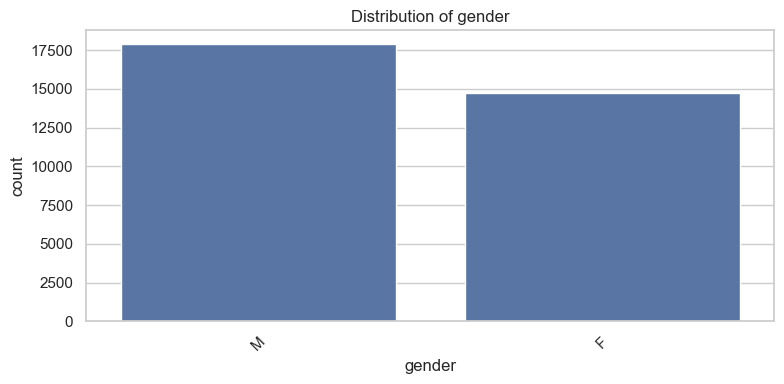

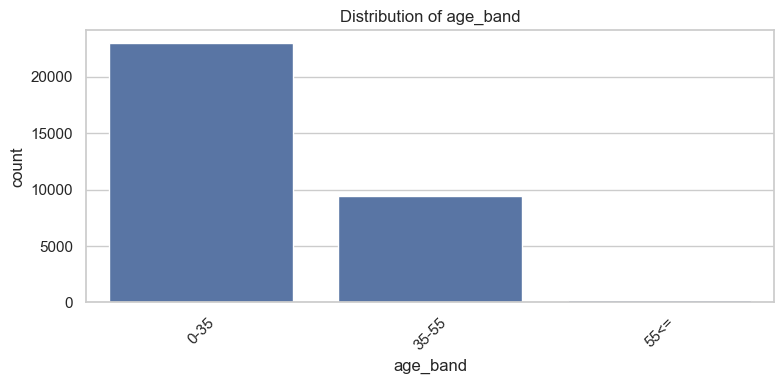

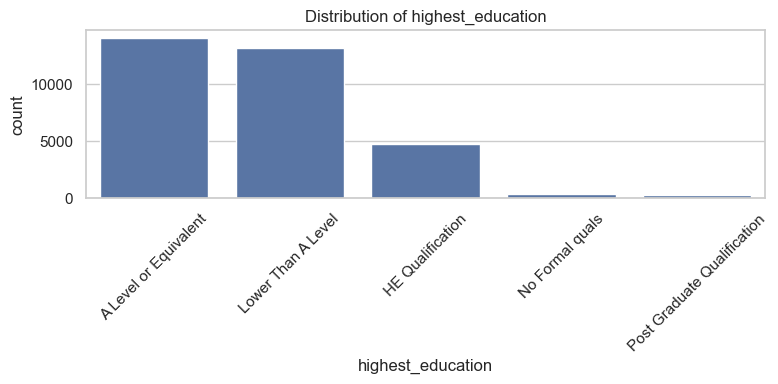

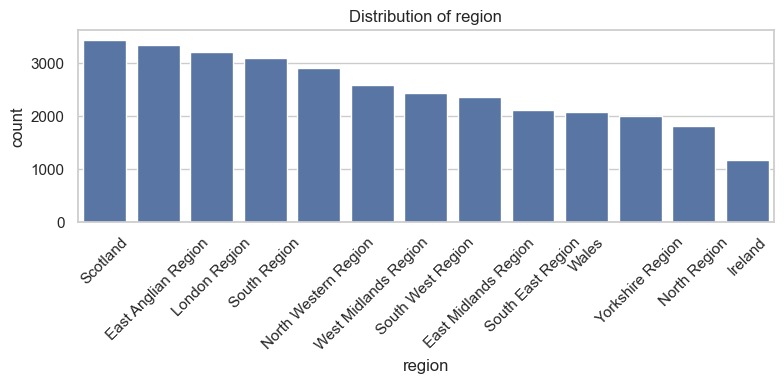

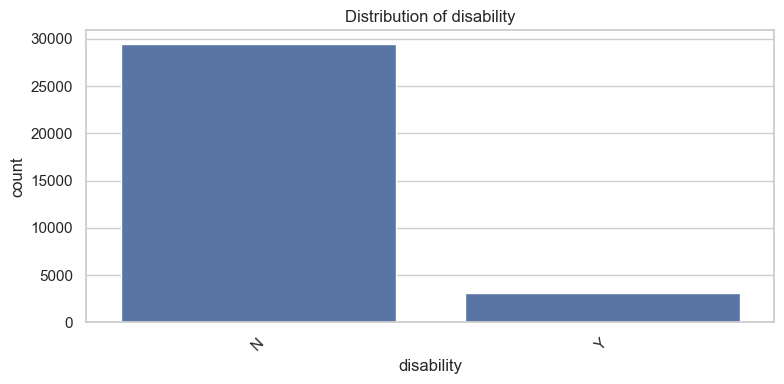

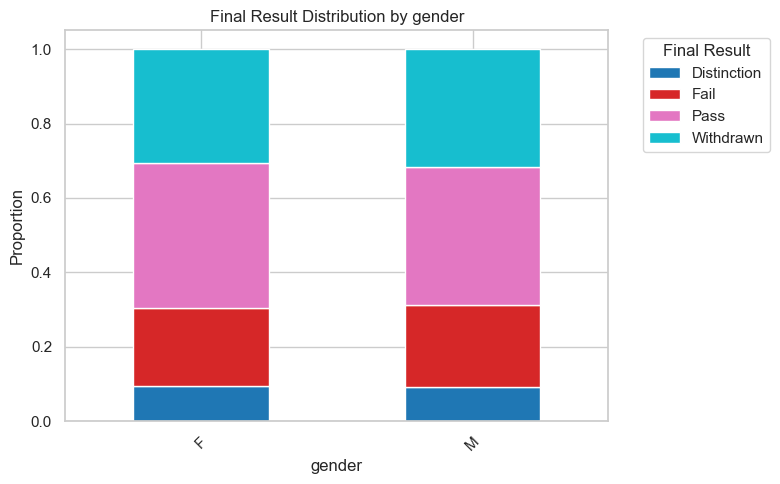

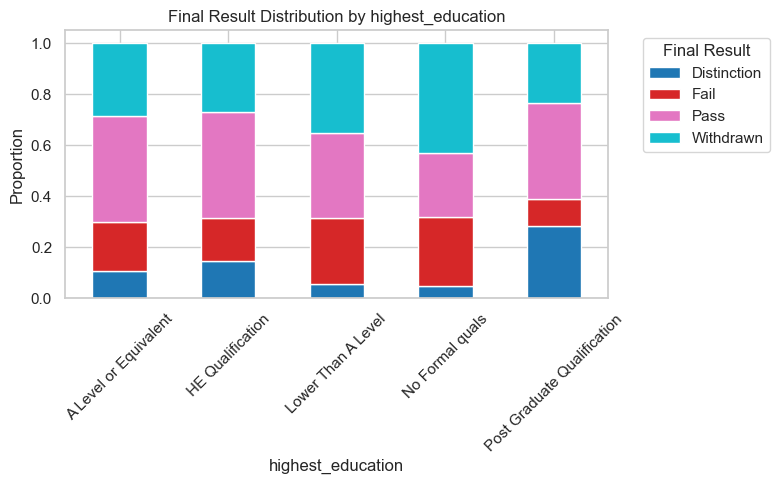

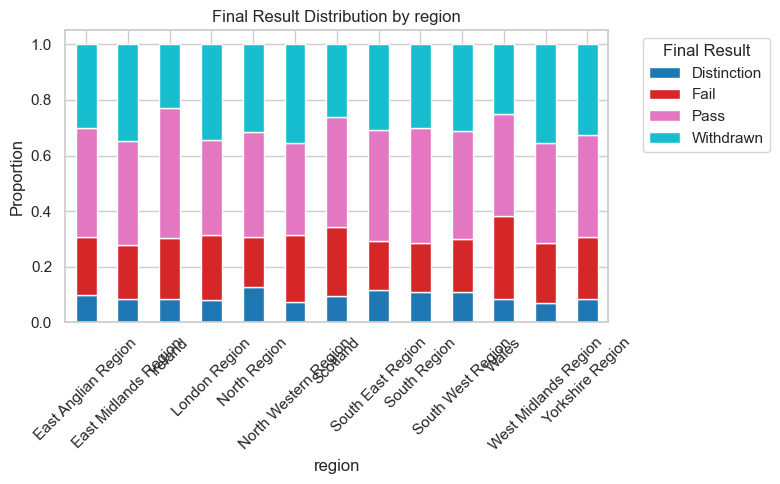

In [5]:

# Load studentInfo.csv
df_info = df_dict["studentInfo"]
# Plot feature distributions (Pie/Bar)
categorical_cols = ['gender', 'age_band', 'highest_education', 'region', 'disability']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df_info, x=col, order=df_info[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Stacked bar chart for final_result distribution by category
for col in ['gender', 'highest_education', 'region']:
    cross_tab = pd.crosstab(df_info[col], df_info['final_result'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab10')
    plt.title(f"Final Result Distribution by {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Overview of studentAssessment.csv

In [6]:
# Check score distribution and missing values
df_sa = df_dict['studentAssessment']
df_sa.info()
df_sa['score'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

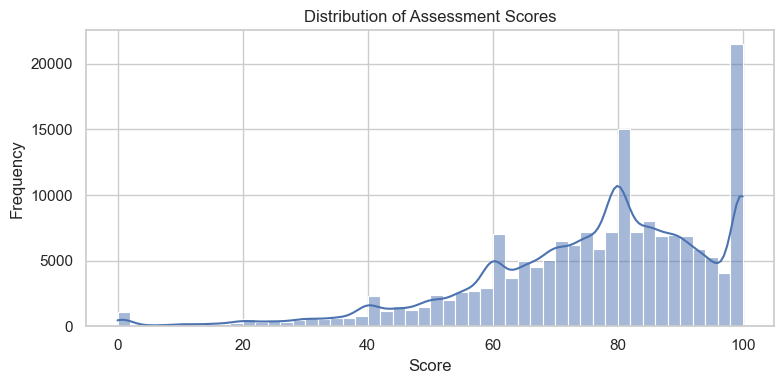

In [7]:
# Plot distribution of assessment scores
plt.figure(figsize=(8, 4))
sns.histplot(df_sa['score'].dropna(), bins=50, kde=True)
plt.title("Distribution of Assessment Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Overview of studentVle.csv

In [8]:
# Analyze studentVle click data
df_vle = df_dict['studentVle']
df_vle.info()
df_vle['sum_click'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


count    1.065528e+07
mean     3.716946e+00
std      8.849047e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.977000e+03
Name: sum_click, dtype: float64

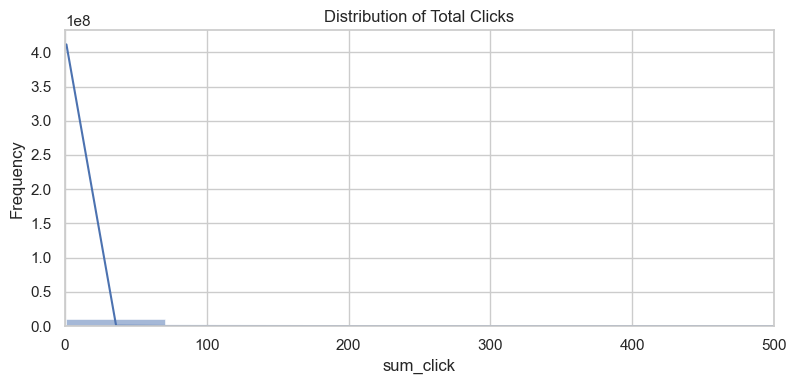

In [9]:
# Plot sum_click distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_vle['sum_click'], bins=100, kde=True)
plt.title("Distribution of Total Clicks")
plt.xlabel("sum_click")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xlim(0, 500)  # Limit x-axis to remove extreme outliers for visibility
plt.show()

### Quick Glance at Other Tables

In [10]:
### Quick Glance at Other Tables

# Inspect basic information and head of each remaining table
for name in ['assessments', 'courses', 'studentRegistration', 'vle']:
    print(f"\n===== {name.upper()} =====")
    df = df_dict[name]
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    display(df.head())
    display(df.describe(include='all'))



===== ASSESSMENTS =====
Shape: (206, 6)
Columns: ['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight']


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,195.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.005128,20.873786
std,NaN,NaN,10098.625521,NaN,76.001119,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,71.000000,0.000000
50%,NaN,NaN,25364.500000,NaN,152.000000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000



===== COURSES =====
Shape: (22, 3)
Columns: ['code_module', 'code_presentation', 'module_presentation_length']


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000



===== STUDENTREGISTRATION =====
Shape: (32593, 5)
Columns: ['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration']


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32548.000000,10072.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.411300,49.757645
std,NaN,NaN,5.491673e+05,49.260522,82.460890
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-2.000000
50%,NaN,NaN,5.903100e+05,-57.000000,27.000000
75%,NaN,NaN,6.444530e+05,-29.000000,109.000000



===== VLE =====
Shape: (6364, 6)
Columns: ['id_site', 'code_module', 'code_presentation', 'activity_type', 'week_from', 'week_to']


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,6.364000e+03,6364,6364,6364,1121.000000,1121.000000
unique,NaN,7,4,20,NaN,NaN
top,NaN,FFF,2013J,resource,NaN,NaN
freq,NaN,1967,1772,2660,NaN,NaN
mean,7.260991e+05,NaN,NaN,NaN,15.204282,15.214987
std,1.283151e+05,NaN,NaN,NaN,8.792865,8.779806
min,5.267210e+05,NaN,NaN,NaN,0.000000,0.000000
25%,6.615928e+05,NaN,NaN,NaN,8.000000,8.000000
50%,7.300965e+05,NaN,NaN,NaN,15.000000,15.000000
75%,8.140162e+05,NaN,NaN,NaN,22.000000,22.000000


## Show distribution of assessment weights

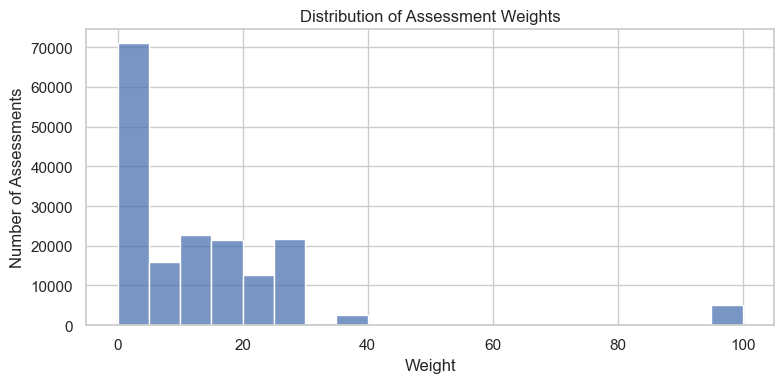

,total_assessments,pass_rate,fail_rate
weight,,,
0.0,46987,0.975951,0.024049
1.0,15958,0.992731,0.007269
2.0,4273,0.877838,0.122162
3.0,2318,0.932269,0.067731
4.0,1406,0.921053,0.078947
5.0,5651,0.984604,0.015396
6.0,518,0.847490,0.152510
7.0,2563,0.936403,0.063597
7.5,988,0.937247,0.062753


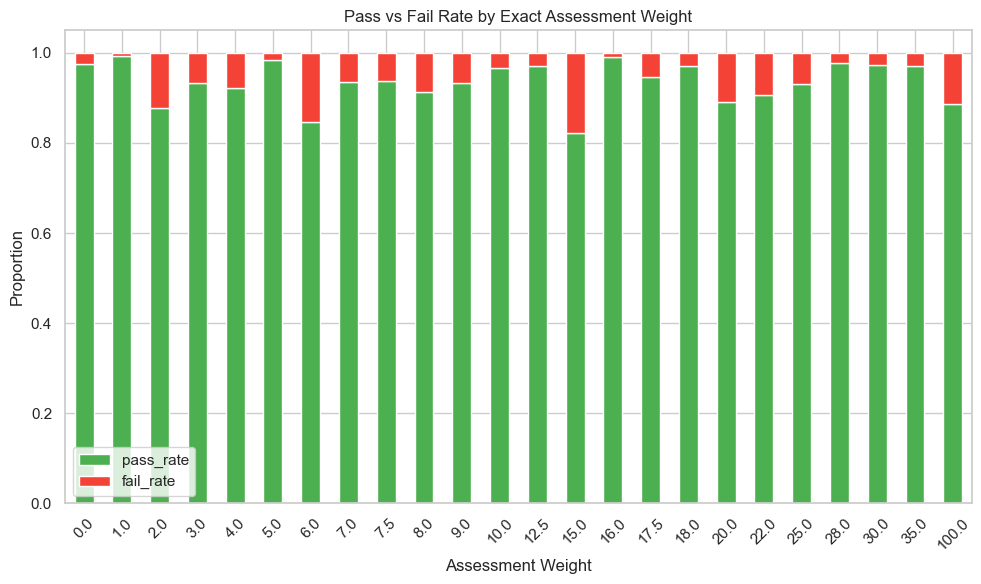

In [11]:
### Assessment Weight Distribution and Success Rate Analysis

# Merge studentAssessment with assessments to get weight and assessment type
df_assessments = df_dict['assessments']
df_sa = df_dict['studentAssessment']
df_merged = df_sa.merge(df_assessments[['id_assessment', 'assessment_type', 'weight']], on='id_assessment', how='left')

# Check distribution of assessment weight
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['weight'], bins=20, kde=False)
plt.title("Distribution of Assessment Weights")
plt.xlabel("Weight")
plt.ylabel("Number of Assessments")
plt.tight_layout()
plt.show()

# Create a pass/fail flag (assume score >= 40 is pass)
df_merged['passed'] = df_merged['score'] >= 40

### Pass vs Fail Rate by Exact Assessment Weight (No Binning)

# Group by exact weight
exact_weight_summary = df_merged.groupby('weight')['passed'].agg(['count', 'mean'])
exact_weight_summary.rename(columns={'count': 'total_assessments', 'mean': 'pass_rate'}, inplace=True)
exact_weight_summary['fail_rate'] = 1 - exact_weight_summary['pass_rate']

# Sort by weight for consistent plotting
exact_weight_summary = exact_weight_summary.sort_index()

# Display the table
display(exact_weight_summary)

# Plot pass vs fail rate per exact weight
exact_weight_summary[['pass_rate', 'fail_rate']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#F44336'])
plt.title("Pass vs Fail Rate by Exact Assessment Weight")
plt.ylabel("Proportion")
plt.xlabel("Assessment Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



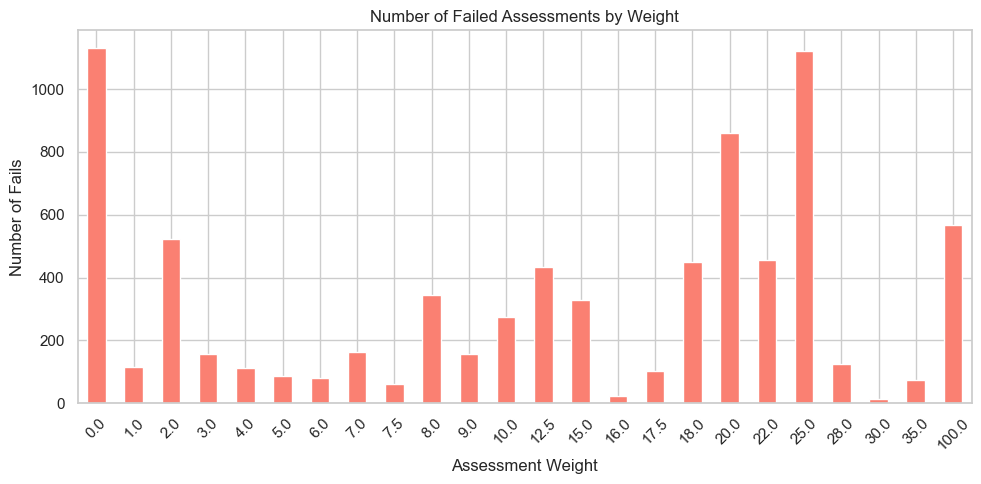

In [12]:
### Count of Failed Assessments by Assessment Weight

# 按照 weight 聚合，统计 fail 数量（score < 40）
fail_counts_by_weight = df_merged[df_merged['passed'] == False].groupby('weight').size()

# 所有 weight 的数量（为了对齐柱状图 x 轴）
all_weights = df_merged['weight'].value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(10, 5))
fail_counts_by_weight.reindex(all_weights.index, fill_value=0).plot(kind='bar', color='salmon')
plt.title("Number of Failed Assessments by Weight")
plt.xlabel("Assessment Weight")
plt.ylabel("Number of Fails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
print(df_merged.columns)

Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'assessment_type', 'weight', 'passed'],
      dtype='object')


,total_assessments,pass_rate,fail_rate
code_module,,,
CCC,18940,0.906494,0.093506
DDD,30864,0.908113,0.091887
BBB,43032,0.965746,0.034254
AAA,3149,0.970467,0.029533
FFF,54815,0.979422,0.020578
GGG,15219,0.980156,0.019844
EEE,7893,0.981376,0.018624


C:\Users\26358\AppData\Local\Temp\ipykernel_25780\4156111903.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fail_by_module.index, y=fail_by_module['fail_rate'], palette='Reds_r')


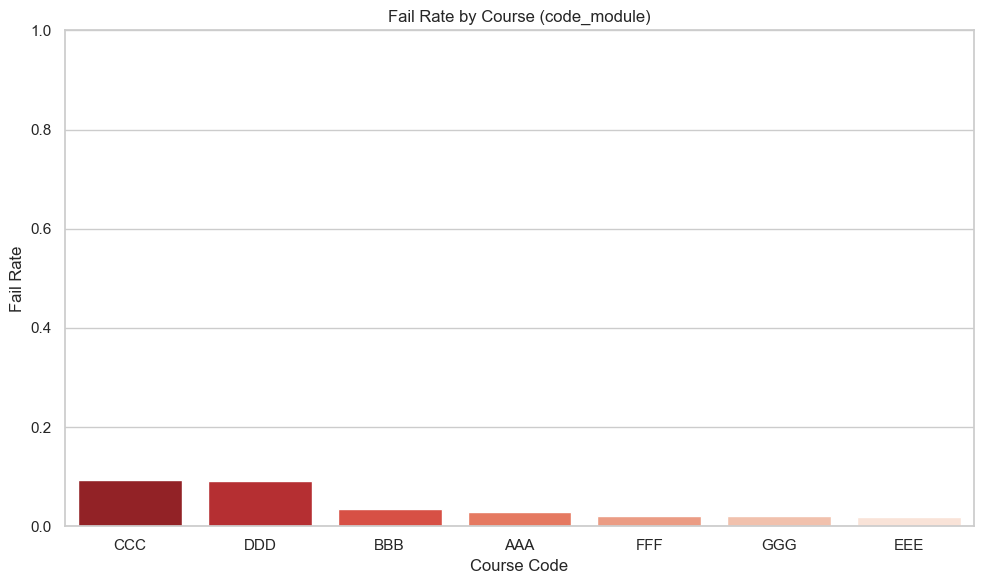

In [14]:
### Merge in Course Info for Fail Rate by Module

# 合并 assessments 的额外字段（code_module 和 code_presentation）
df_assessments = df_dict['assessments'][['id_assessment', 'assessment_type', 'weight', 'code_module', 'code_presentation']]
df_sa = df_dict['studentAssessment']
df_merged = df_sa.merge(df_assessments, on='id_assessment', how='left')

# 添加 passed 列（score >= 40）
df_merged['passed'] = df_merged['score'] >= 40


### Fail Rate by Course (code_module)
fail_by_module = df_merged.groupby('code_module')['passed'].agg(['count', 'mean'])
fail_by_module.rename(columns={'count': 'total_assessments', 'mean': 'pass_rate'}, inplace=True)
fail_by_module['fail_rate'] = 1 - fail_by_module['pass_rate']

# Sort and display
fail_by_module = fail_by_module.sort_values('fail_rate', ascending=False)
display(fail_by_module)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fail_by_module.index, y=fail_by_module['fail_rate'], palette='Reds_r')
plt.title("Fail Rate by Course (code_module)")
plt.ylabel("Fail Rate")
plt.xlabel("Course Code")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



,total_assessments,pass_rate,fail_rate
module_term,,,
BBB 2014J,7408,0.883909,0.116091
CCC 2014B,7489,0.891040,0.108960
DDD 2014B,4542,0.895421,0.104579
DDD 2013B,10373,0.899836,0.100164
DDD 2013J,7936,0.905620,0.094380
CCC 2014J,11451,0.916601,0.083399
DDD 2014J,8013,0.928491,0.071509
AAA 2014J,1516,0.966359,0.033641
EEE 2014B,1780,0.974157,0.025843


C:\Users\26358\AppData\Local\Temp\ipykernel_25780\1024782786.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


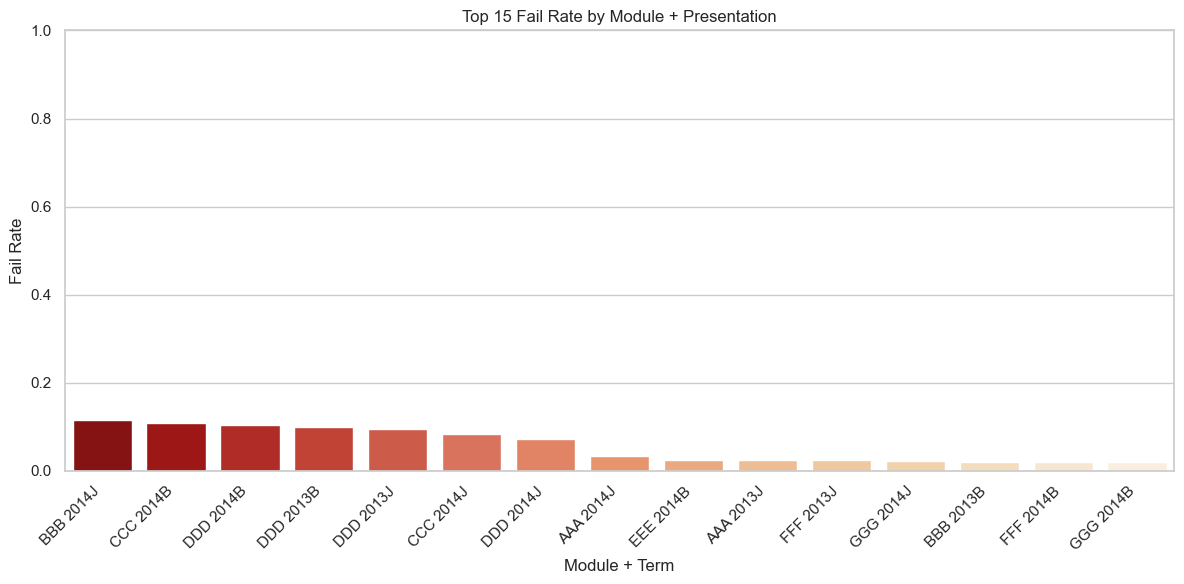

In [15]:
### Fail Rate by Course and Term (code_module + code_presentation)

# 组合模块+学期字段
df_merged['module_term'] = df_merged['code_module'] + ' ' + df_merged['code_presentation']

# 聚合 fail 情况
fail_by_module_term = df_merged.groupby('module_term')['passed'].agg(['count', 'mean'])
fail_by_module_term.rename(columns={'count': 'total_assessments', 'mean': 'pass_rate'}, inplace=True)
fail_by_module_term['fail_rate'] = 1 - fail_by_module_term['pass_rate']

# 排序显示 fail_rate 最高的组合
fail_by_module_term = fail_by_module_term.sort_values('fail_rate', ascending=False)
display(fail_by_module_term.head(10))  # 可以调大，比如 top 20

# 绘制前15个 fail_rate 最高的模块+学期
plt.figure(figsize=(12, 6))
top_n = 15
sns.barplot(
    x=fail_by_module_term.head(top_n).index,
    y=fail_by_module_term.head(top_n)['fail_rate'],
    palette='OrRd_r'
)
plt.title(f"Top {top_n} Fail Rate by Module + Presentation")
plt.ylabel("Fail Rate")
plt.xlabel("Module + Term")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
